In [ ]:
"""ONLY USED FOR FINDING STOCKS"""

names=[x for x,y in zip(stocks["Name"].value_counts().sort_values(ascending=False).index,\
                        stocks["Name"].value_counts().sort_values(ascending=False).values) if y>1]

names=['Price']
# [x for x in stocks["Name"] if x[0:3]=="Mat"] #-->Additional Search Method; looks for first three letters

#Finds all instances of a company name within stocks["Name"], and prints the instance and its index numer
for name in names:
    i=0
    while i<len(stocks):
        if stocks.loc[i,"Name"]==name:
            print "index: ",i
            print stocks.iloc[i]
            print "\n"
        i+=1
# top=stocks.index
# keep=[]
# for x in top:
#     if x not in del_indices:
#         keep.append(x)
# len(keep)

In [3]:
#KPMG, Razorfish, Elevate Credit, AOL, BCG Digital Ventures 
    #have 25 entries or so; think of something to do with it

change={"GE": "General Electric Company", "IBM":"Microsoft","Capital One":"Capital One Financial",
        "Verizon":"Verizon Communications","Hewlett Packard Enterprise | HPE":'Hewlett Packard Enterprise Company',
       "Hewlett-Packard":'Hewlett Packard Enterprise Company',"Alliance Data":"Alliance Data Systems",
       'Raytheon':'Raytheon Company',"GE":'General Electric Company',"Verizon Wireless":"Verizon Communications",
       "Intel Corporation":"Intel","MaxPoint":"MaxPoint Interactive","General Motors":"General Motors Company",
       "Booz Allen Hamilton":"Booz Allen Hamilton Holding","Nielsen":"Nielsen N.V.","SAP":"SAP SE",
       "General Dynamics Mission Systems":"General Dynamics","Leidos":"Leidos Holdings",
       "Honeywell":"Honeywell International","Akamai":"Akamai Technologies","BNY Mellon":"Bank Of New York Mellon",
       "FIS":"Fidelity National Information Services","J.P. Morgan":'J P Morgan Chase & Co',
       "Walmart":'Wal-Mart Stores',"PayPal":"PayPal Holdings","Adobe":"Adobe Systems",'AOL':"Verizon Communications"}

In [ ]:
[x for x in stocks["Name"] if x[0:3]=="Exp"] #-->Additional Search Method; looks for first three letters

In [ ]:
[x for x in stocks["Name"] if "Price".lower() in x.lower()]

In [ ]:
df[df["MarketCap"]=='Unknown']

In [26]:
import pandas as pd
import numpy as np
import requests
import bs4
import pandas as pd
from bs4 import BeautifulSoup
import datetime
import urllib
import statsmodels.api as sm
from sklearn import linear_model
import sklearn
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import time
import statsmodels.api as sm
from scipy import stats
from sklearn import datasets, linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
% matplotlib inline
lm = linear_model.LinearRegression()
LR=sklearn.linear_model.LogisticRegression
LRCV=sklearn.linear_model.LogisticRegressionCV

In [2]:
def renaming(x):
    new_name=""
    if x==("Junior Data Scientist"or"Entry Level Data Scientist" or "Data Scientist II" or "Associate Data Scientist"):
        new_name="Junior DS"
    elif x==("Senior Data Scientist" or "Principal Data Scientist"):
        new_name=="Senior DS"
    else:
        new_name="DS"
    return new_name
def name_change(x):
    new_value=""
    if x in change.keys():
        new_value=change[x]
    else:
        new_value=x
    return new_value
def cap(x):
    value=0
    if x is np.NAN:
        value="Unknown"
    elif x>2000:
        value="Hugecap"
    elif x>500:
        value="Largecap"
    elif x>100:
        value="Midcap"
    else:
        value="Smallcap"
    return value
def create_bins(low,high,n):
    increment=(high-low)/float(n)
    bins=[]
    for i in range(n+1):
        bins.append(low+increment*(i))
    replacements=[]
    i=0
    while i<len(bins)-1:
        replacements.append(str(int(round(bins[i])))+"-"+str(int(round(bins[i+1]))))
        i+=1
    return bins,replacements
def salary_bin(bins,replacements,x):
    i=0
    value=0
    while i<len(bins)-1:
        if x<=int(round(bins[i+1])):
            value=replacements[i]
            i=len(bins)
        i+=1
    if value==0:
        value=str(bins[-1])+"+"
    return value
def only_numerics(seq):
    seq = seq.split('-')
    try:
        out = ((int(filter(type(seq[0]).isdigit, seq[0])) + int(filter(type(seq[1]).isdigit, seq[1])))/2)*1000
    except:
        out = int(filter(type(seq[0]).isdigit, seq[0]))
    return out


In [ ]:
import pandas as pd
import numpy as np

#Cleans up the Stock information
nyse=pd.read_csv("Data/NYSE.csv")
nasdaq=pd.read_csv("Data/NASDAQ.csv")
amex=pd.read_csv("Data/AMEX.csv")
stocks=nyse.append(nasdaq,ignore_index=True).append(amex,ignore_index=True)
del stocks["Summary Quote"]
i=0
while i<len(stocks["Symbol"]):
    if " (The)" in stocks.iloc[i,1]:
        stocks.iloc[i,1]=stocks.iloc[i,1][:len(stocks.iloc[i,1])-len(" (The)")]
    if " Incorporated" in stocks.iloc[i,1]:
        stocks.iloc[i,1]=stocks.iloc[i,1][:len(stocks.iloc[i,1])-len(" Incorporated")]
    if ", Inc." in stocks.iloc[i,1]:
        stocks.iloc[i,1]=stocks.iloc[i,1][:len(stocks.iloc[i,1])-len(", Inc.")]
    if ", Inc" in stocks.iloc[i,1]:
        stocks.iloc[i,1]=stocks.iloc[i,1][:len(stocks.iloc[i,1])-len(", Inc")]
    if ", INC" in stocks.iloc[i,1]:
        stocks.iloc[i,1]=stocks.iloc[i,1][:len(stocks.iloc[i,1])-len(", Inc")]
    if " Inc." in stocks.iloc[i,1]:
        stocks.iloc[i,1]=stocks.iloc[i,1][:len(stocks.iloc[i,1])-len(" Inc.")]
    if " Inc" in stocks.iloc[i,1]:
        stocks.iloc[i,1]=stocks.iloc[i,1][:len(stocks.iloc[i,1])-len(" Inc")]
    if " INC" in stocks.iloc[i,1]:
        stocks.iloc[i,1]=stocks.iloc[i,1][:len(stocks.iloc[i,1])-len(" Inc")]
    if  " Corporation" in stocks.iloc[i,1]:
        stocks.iloc[i,1]=stocks.iloc[i,1][:len(stocks.iloc[i,1])-len(" Corporation")]
    if " Corp." in stocks.iloc[i,1]:
        stocks.iloc[i,1]=stocks.iloc[i,1][:len(stocks.iloc[i,1])-len(" Corp.")]
    if " Corp" in stocks.iloc[i,1]:
        stocks.iloc[i,1]=stocks.iloc[i,1][:len(stocks.iloc[i,1])-len(" Corp")]
    if " CORP" in stocks.iloc[i,1]:
        stocks.iloc[i,1]=stocks.iloc[i,1][:len(stocks.iloc[i,1])-len(" Corp")]
    i+=1

#Eliminates Duplicates, inactive tickers, and funds
#For MarketCap n/a; the tickers listed had 1 market value and all other duplicates were n/a; safe to remove
#Additionally, there was the occasional case of no market cap; market cap must have been insignificant or bankrupt
#stocks= stocks[stocks['MarketCap']!="n/a"]
#stocks= stocks[stocks['industry']!="n/a"]
#stocks= stocks[stocks['Sector']!="n/a"]
#stocks= stocks[stocks['IPOyear']!="n/a"]

#Convert MarketCap to Millions of dollars
i=0
while i<len(stocks["MarketCap"]):
    if "B" in str(stocks.iloc[i,3])[-1:]:
        stocks.iloc[i,3]=float(str(stocks.iloc[i,3])[1:-1])*1000
    else:
        stocks.iloc[i,3]=str(stocks.iloc[i,3])[1:-1]
    i+=1

stocks=stocks.reset_index()
del stocks['index']
#delete={1572:'WYIGU',1001:'ANDAU',873:'FNFV',1322:'ELECU',1376:'FCFS',1134:'CLACU',2041:'TRTLU',1706:'MSG'}
# keys=delete.keys()
# keys.sort()
# keys=keys[::-1]
# for key in keys:
#     stocks=stocks.iloc[:key].append(stocks.iloc[key+1:])
# stocks=stocks.reset_index()
# del stocks['index']

#Cleans cities data (eliminates counties and combined cities/towns)
cities=pd.read_csv("Data/Living_Index.csv")
cities=cities.rename(columns={"Urban Area":"City"})
values=[]
for x in cities["City"]:
    if "-" in x:
        values.append(False)
    else:
        values.append(True)
cities=cities[values]
values=[]
for x in cities["City"]:
    if "county" in x.lower():
        values.append(False)
    else:
        values.append(True)
cities=cities[values]
new_city_list=[]

for x in cities["City"]:
    y=x[-4:]
    z=x[:-len(y)].replace(",","")+y
    new_city_list.append(z)
cities["City"]=new_city_list

In [ ]:
#Put ticker of name instances into a dictionary for all duplicates

#Gives the duplicates in a list called names
names=[x for x,y in zip(stocks["Name"].value_counts().sort_values(ascending=False).index,\
                        stocks["Name"].value_counts().sort_values(ascending=False).values) if y>1]
indices=[]
index=[]
dic={}
i=0
while i < len(stocks["Name"]):
    if stocks.loc[i,"Name"] in names:
        if stocks.loc[i,"Name"] in dic.keys():
            dic[stocks.loc[i,"Name"]].append([stocks.loc[i,"Symbol"],stocks.loc[i,"MarketCap"]])
        else:
            dic[stocks.loc[i,"Name"]]=[[stocks.loc[i,"Symbol"],stocks.loc[i,"MarketCap"]]]
    i+=1

#Look up to see if there is a single entry with a market cap for the duplicates; if there is, delete others

#Checks to see if among duplicate entries there is only a single one with market cap
caps=[]
for key in dic.keys():
    l=dic[key]
    single_cap=False
    num_caps=0
    for x in l:
        if x[1]!="/":
            num_caps+=1
        if num_caps==1:
            single_cap=True
        else: 
            single_cap=False
    caps.append([key,single_cap])

#Finds tickers without market cap to delete
delete=[]
for x in caps:
    if x[1]==True:
            #If there is a single market cap value, deletes all others
        for y in dic[x[0]]:
            if y[1]=="/":
                delete.append(y[0])
    if x[1]==False:
            #Checks to see if there are duplicate market cap values; if there are, resorts to largest
        mult=False
        count=0
        for y in dic[x[0]]:
            if y[1]!="/":
                count+=1
            if count>1:
                mult=True
        largest=0
        save_ticker=""
        if mult:
            for y in dic[x[0]]:
                if y[1]!="/":
                    if y[1]>largest:
                        largest=y[1]
                        save_ticker=y[0]
            for z in dic[x[0]]:
                if z[0]!=save_ticker:
                    delete.append(z[0])
            #If there are no market cap values, resorts to shortest ticker name
        else:
            save_ticker=""
            length=10
            for y in dic[x[0]]:
                if len(y[0])<length:
                    save_ticker=y[1]
            for z in dic[x[0]]:
                if z[0]!=save_ticker:
                    delete.append(z[0])

#NOW, time to go through and delete the unneeded rows; 
    #reset the index, get the indices, reverse order the sort,
    #and reset the dataframe on each value; then reset index

indices=[]
i=0
while i<len(stocks):
    if stocks.loc[i,"Symbol"] in delete:
        indices.append(i)
    i+=1
indices.sort()
indices=indices[::-1]
for key in indices:
    stocks=stocks.iloc[:key].append(stocks.iloc[key+1:])
stocks=stocks.reset_index()
del stocks['index']

#There is only one case left; where there are duplicate entries; let's delete those now
names=[x for x,y in zip(stocks["Name"].value_counts().sort_values(ascending=False).index,\
                        stocks["Name"].value_counts().sort_values(ascending=False).values) if y>1]
delete=[]

for name in names:
    first=True
    i=0
    while i<len(stocks["Name"]):
        if first:
            first=False
        if stocks.loc[i,"Name"]==name:
            delete.append(i)
        i+=1
delete.sort()
delete=delete[::-1]
for key in delete:
    stocks=stocks.iloc[:key].append(stocks.iloc[key+1:])
stocks=stocks.reset_index()
del stocks['index']

In [ ]:
#Takes in json of webscraped information, puts it into a dataframe, converts Salary information to integers
glass_door=pd.DataFrame(columns=["Salary","Company","Location"])

extension="Data/allcities.json"
json=pd.read_json(extension)
df=pd.DataFrame([json["city"],json["company"],json["meanPay"],json["jobTitle"]]).T
df.columns=["Location","Company","Salary","Job"]
temp=[]


df['Salary'] = df['Salary'].apply(only_numerics)
df=df[pd.notnull(df["Salary"])].reset_index()
del df['index']
df["Salary"]=df['Salary'].astype(np.float)#

glass_door=glass_door.append(df,ignore_index=True)



df.columns=["Location","Company","Salary","Job"]
temp=[]


df['Salary'] = df['Salary'].apply(only_numerics)
df=df[pd.notnull(df["Salary"])].reset_index()
del df['index']
df["Salary"]=df['Salary'].astype(np.float)#

glass_door=glass_door.append(df,ignore_index=True)

df=pd.merge(glass_door,cities,left_on="Location",right_on="City")
df=pd.merge(df,stocks,left_on="Company",right_on="Name",how='inner')
i=0
delete=[]
for x in df["Salary"]:
    if x<10000:
        delete.append(i)
    i+=1
delete.sort()
delete=delete[::-1]
for key in delete:
    df=df.iloc[:key].append(df.iloc[key+1:])
df=df.reset_index()
del df['index']

df['Salary']=df['Salary'].astype(np.int)
df.columns


# todrop=["Software Engineer (Data Scientist)","Data Visualization Scientist",\
#         "Scientist, Statistical and Data Sciences","Associate Data Scientist","Data Scientist Intern - Hourly",\
#         "Data Scientist Intern"]


df["Senior"]=[1 if x else 0 for x in df["Job"]==("Senior Data Scientist")]
df["Mid"]=[1 if x else 0 for x in df["Job"]==("Data Scientist" or "Principal Data Scientist")]
#df["Junior"]=[1 if x else 0 for x in df["Job"]==("Data Scientist I" or "Junior Data Scientist" 
#                                                 or "Data Scientist II")]
df["Large"]=[1 if x else 0 for x in df["MarketCap"]>=500]
df["Small"]=[1 if x else 0 for x in df["MarketCap"]<100]
i=0
while i<len(df):
    if df.loc[i,"MarketCap"] is np.NAN:
        df.loc[i,"MarketCap"]=350
    i+=1
df["MarketCap"]=df["MarketCap"].astype(np.float)

copy=df.copy()
print len(df[df["Senior"]==1])
print len(df[df["Mid"]==1])

In [ ]:
240/92.

In [ ]:
plt.hist(df[df["Senior"]==1]["Salary"],bins=10);
plt.hist((df[df["Mid"]==1]["Salary"]),bins=26);

In [ ]:
n=3
increment=(199000-48000.)/float(n)
bins=[48000,85750,148667,199000]
bins=[]
for i in range(n+1):
    bins.append(48000+increment*(i))

replacements=[]
i=0
while i<len(bins)-1:
    replacements.append(str(int(round(bins[i])))+"-"+str(int(round(bins[i+1]))))
    i+=1
    

df=copy.copy()
df["Salary"]=df['Salary'].apply(lambda x: salary_bin(x))
df1=pd.get_dummies(df,columns=["Salary"])

cols=['100% Composite Index','Senior',"Mid","Large"]
# for y in [x for x in df1.columns[20:]]:
#     cols.append(y) 
    
    
X_train,X_test,y_train,y_test=train_test_split(df1[cols],df['Salary'],test_size=.4)#,random_state=69
""" Fit a binary classification predictor."""
logreg = LogisticRegression(solver='lbfgs') #'newton-cg', 'lbfgs', 'liblinear', 'sag'
C_vals = [10**x for x in range (-5,5)]
penalties = ['l2']

gs = GridSearchCV(logreg, {'penalty': penalties, 'C': C_vals}, verbose=False, cv=3)
gs.fit(X_train, y_train)

logreg = LogisticRegression(C=gs.best_params_['C'], penalty=gs.best_params_['penalty'])
cv_model = logreg.fit(X_train, y_train)
cv_pred = cv_model.predict(X_test)

y_score = cv_model.decision_function(X_test) # Submit these response, the output of model.decision_function

""" Check your performance so far."""

conmat = np.array(confusion_matrix(y_test, cv_pred))
confusion = pd.DataFrame(conmat, index=replacements, columns=replacements)

print(confusion)
print classification_report(y_test,cv_pred)
print cv_model.coef_

In [ ]:
""" Fit a binary classification predictor."""
logreg = LogisticRegression(solver='liblinear') #'newton-cg', 'lbfgs', 'liblinear', 'sag'
C_vals = [10**x for x in range (-5,5)]
penalties = ['l1','l2']

gs = GridSearchCV(logreg, {'penalty': penalties, 'C': C_vals}, verbose=False, cv=3)
gs.fit(X_train, y_train)

logreg = LogisticRegression(C=gs.best_params_['C'], penalty=gs.best_params_['penalty'])
cv_model = logreg.fit(X_train, y_train)
cv_pred = cv_model.predict(X_test)

y_score = cv_model.decision_function(X_test) # Submit these response, the output of model.decision_function

""" Check your performance so far."""

conmat = np.array(confusion_matrix(y_test, cv_pred))
confusion = pd.DataFrame(conmat, index=replacements,
                            columns=replacements)

print(confusion)
print classification_report(y_test,cv_pred)


In [ ]:
roc_auc_score(y_test, y_score)

""" Plot AUC"""

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for high/low income', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [ ]:
#Linear Regression
xtr=x_train
xte=x_test
ytr=y_train
yte=y_test

xtr=np.array(xtr).reshape(len(xtr),4)
xte=np.array(xte).reshape(len(xte),4)
xtr2=sm.add_constant(xtr)
model=sm.OLS(ytr,xtr).fit()

xte2=sm.add_constant(xte)
pred=model.predict(xte)

plt.plot(pred,yte,'o')
plt.plot(pred,pred,'-')
plt.xlim(0,180000)
plt.ylim(0,180000)
plt.show()

print model.summary2()

In [ ]:
temp=xtr[:len(xtr)/3]
plt.hist(xte["100% Composite Index"],bins=5)
plt.hist(temp["100% Composite Index"],bins=5)
plt.show()

In [ ]:
df.iloc[730]

For the logistic regressions, make the discrete value a bin; the smallest bin will be 0. The goal should be to make the bins be organized so that a linear plot can be drawn through them. If the linear plot does not run through them, then there is significant risk of misidentifying a bin. Depending on what the x-axis is (most-likely score), the bins will have to have an equal width along this x-axis (i.e., all bins having a width of x-units on the x-axis).

Contrarily, we want evenly distributed bins in the price aspect.

So, if one were to not do a multinomial logistic regression, one could additionally do a series of logistic regressions. One would check to see if the point goes into bin 0 or 1. If it goes into 1, one would check to see if it goes into bins 1 or 2. If it is in bin 2, one would see if it goes into bins 2 or 3... If it does not go into the higher bin, the regression sequence ends, and the point enters the lower of the two bins.
### Scratch ^; essentially a multinomial logistic regression

In [ ]:
df.head()

In [ ]:
#Merge Company Data and Location Data

In [ ]:
plt.hist(glass_door[glass_door["Job"]=="Senior Data Scientist"]["Salary"],bins=10)
plt.hist(glass_door[glass_door["Job"]=="Data Scientist"]["Salary"],bins=36);

In [ ]:
glass_door=glass_door.merge(cities, left_on="Location", right_on="City")

In [ ]:
glass_door=glass_door.merge(cities, left_on="Location", right_on="City")
glass_door["Normalized Salary"]=glass_door["Salary"]/glass_door["100% Composite Index"]

In [ ]:
glass_door

In [ ]:
average=np.mean(glass_door["100% Composite Index"])
#\plt.hist(glass_door["Salary"]/average,width=50)
plt.hist(glass_door["Normalized Salary"],bins=50);

In [ ]:
df=glass_door.copy()
df["Senior"]=[1 if x else 0 for x in df["Job"]==("Senior Data Scientist" or "Principal Data Scientist")]
df["Mid"]=[1 if x else 0 for x in df["Job"]==("Data Scientist")]
    
#df=df[df["Job"]==("Data Scientist" or "Principal Data Scientist" or "Senior Data Scientist")]
cols=['Senior',"Mid"]
    
    
x_train,x_test,y_train,y_test=train_test_split(df[cols],df['Normalized Salary'],test_size=.35,random_state=70)
""" Fit a binary classification predictor."""
#Linear Regression
xtr=x_train
xte=x_test
ytr=y_train
yte=y_test

xtr=np.array(xtr).reshape(len(xtr),2)
xte=np.array(xte).reshape(len(xte),2)
xtr2=sm.add_constant(xtr)
model=sm.OLS(ytr,xtr).fit()

xte2=sm.add_constant(xte)
pred=model.predict(xte)

plt.plot(pred,yte,'o')
plt.plot(pred,pred,'-')
plt.xlim(0,2000)
plt.ylim(0,2000)
plt.show()

print model.summary2()

In [4]:
#Unnormalize everything

In [5]:
#Cleans up the Stock information
nyse=pd.read_csv("Data/NYSE.csv")
nasdaq=pd.read_csv("Data/NASDAQ.csv")
amex=pd.read_csv("Data/AMEX.csv")
stocks=nyse.append(nasdaq,ignore_index=True).append(amex,ignore_index=True)
del stocks["Summary Quote"]
i=0
while i<len(stocks["Symbol"]):
    if " (The)" in stocks.iloc[i,1]:
        stocks.iloc[i,1]=stocks.iloc[i,1][:len(stocks.iloc[i,1])-len(" (The)")]
    if " Incorporated" in stocks.iloc[i,1]:
        stocks.iloc[i,1]=stocks.iloc[i,1][:len(stocks.iloc[i,1])-len(" Incorporated")]
    if ", Inc." in stocks.iloc[i,1]:
        stocks.iloc[i,1]=stocks.iloc[i,1][:len(stocks.iloc[i,1])-len(", Inc.")]
    if ", Inc" in stocks.iloc[i,1]:
        stocks.iloc[i,1]=stocks.iloc[i,1][:len(stocks.iloc[i,1])-len(", Inc")]
    if ", INC" in stocks.iloc[i,1]:
        stocks.iloc[i,1]=stocks.iloc[i,1][:len(stocks.iloc[i,1])-len(", Inc")]
    if " Inc." in stocks.iloc[i,1]:
        stocks.iloc[i,1]=stocks.iloc[i,1][:len(stocks.iloc[i,1])-len(" Inc.")]
    if " Inc" in stocks.iloc[i,1]:
        stocks.iloc[i,1]=stocks.iloc[i,1][:len(stocks.iloc[i,1])-len(" Inc")]
    if " INC" in stocks.iloc[i,1]:
        stocks.iloc[i,1]=stocks.iloc[i,1][:len(stocks.iloc[i,1])-len(" Inc")]
    if  " Corporation" in stocks.iloc[i,1]:
        stocks.iloc[i,1]=stocks.iloc[i,1][:len(stocks.iloc[i,1])-len(" Corporation")]
    if " Corp." in stocks.iloc[i,1]:
        stocks.iloc[i,1]=stocks.iloc[i,1][:len(stocks.iloc[i,1])-len(" Corp.")]
    if " Corp" in stocks.iloc[i,1]:
        stocks.iloc[i,1]=stocks.iloc[i,1][:len(stocks.iloc[i,1])-len(" Corp")]
    if " CORP" in stocks.iloc[i,1]:
        stocks.iloc[i,1]=stocks.iloc[i,1][:len(stocks.iloc[i,1])-len(" Corp")]
    i+=1

#Convert MarketCap to Millions of dollars
i=0
while i<len(stocks["MarketCap"]):
    if "B" in str(stocks.iloc[i,3])[-1:]:
        stocks.iloc[i,3]=float(str(stocks.iloc[i,3])[1:-1])*1000
    else:
        stocks.iloc[i,3]=str(stocks.iloc[i,3])[1:-1]
    i+=1

stocks=stocks.reset_index()
del stocks['index']

#Cleans cities data (eliminates counties and combined cities/towns)
cities=pd.read_csv("Data/Living_Index.csv")
cities=cities.rename(columns={"Urban Area":"City"})
values=[]
for x in cities["City"]:
    if "-" in x:
        values.append(False)
    else:
        values.append(True)
cities=cities[values]
values=[]
for x in cities["City"]:
    if "county" in x.lower():
        values.append(False)
    else:
        values.append(True)
cities=cities[values]
new_city_list=[]

for x in cities["City"]:
    y=x[-4:]
    z=x[:-len(y)].replace(",","")+y
    new_city_list.append(z)
cities["City"]=new_city_list

In [6]:
glass_door=pd.DataFrame(columns=["Salary","Company","Location"])

extension="Data/allcities.json"
json=pd.read_json(extension)
df=pd.DataFrame([json["city"],json["company"],json["meanPay"],json["jobTitle"]]).T
df.columns=["Location","Company","Salary","Job"]
temp=[]


df['Salary'] = df['Salary'].apply(only_numerics)
df=df[pd.notnull(df["Salary"])].reset_index()
del df['index']
df["Salary"]=df['Salary'].astype(np.float)#

glass_door=glass_door.append(df,ignore_index=True)

glass_door["Company"]=glass_door["Company"].apply(lambda x: name_change(x))

glass_door=glass_door.merge(cities, left_on="Location", right_on="City")
glass_door["Normalized Salary"]=glass_door["Salary"]/glass_door["100% Composite Index"]

In [7]:
df=glass_door.copy()
df=df.merge(stocks, how='left',left_on="Company",right_on="Name")
df=df[df["Job"]==("Senior Data Scientist" or "Principal Data Scientist" or "Data Scientist" or "Junior Data Scientist"
                 or "Entry Level Data Scientist" or "Data Scientist II" or "Associate Data Scientist")]

df["Job"]=df["Job"].apply(lambda x: renaming(x))



marketcap_sectors={'KPMG':[24440,"Consulting"],'Razorfish':[np.NaN,"Technology"],
                   'Elevate Credit':[640,"Finance"],'BCG Digital Ventures':[np.NaN,"Finance"]}

###Implementing this makes the f1-score worse
# df=df.reset_index()
# del df["index"]
# i=0
# while i<len(df):
#     if df.loc[i,"Company"] in marketcap_sectors.keys():
#         df.loc[i,"MarketCap"]=marketcap_sectors[df.loc[i,"Company"]][0]
#         df.loc[i,"Sector"]=marketcap_sectors[df.loc[i,"Company"]][1]
#     i+=1

df["Sector"]=["Technology" if pd.isnull(x) else x for x in df["Sector"]]
df["MarketCap"]=df["MarketCap"].apply(lambda x: cap(x))
#df["MarketCapSector"]=df["Sector"]+df["MarketCap"]

In [8]:
df2=pd.get_dummies(df,columns=["Sector","Job","MarketCap","Region","State"])
delete=[u'industry',u'Company', u'Location', u'Salary', u'City',
       u'Symbol', u'Name', u'LastSale', u'IPOyear',u'Normalized Salary',u'100% Composite Index'] 
#u'13 % Grocery Items', u'29 % Housing',
#      u'10% Utilities', u'12 % Transportation', u'4% Health Care',
#       u'32 % Miscellaneous Goods and Services',
for x in delete:
    del df2[x]
temp=pd.DataFrame(df["Normalized Salary"].copy(),columns=["Normalized Salary"])

#ENTER BINS BELOW
bin_NUMBER=3

bins,replacements=create_bins(min(temp["Normalized Salary"]),max(temp["Normalized Salary"]),bin_NUMBER)
temp["Normalized Salary"]=temp["Normalized Salary"].apply(lambda x: salary_bin(bins,replacements,x))
#df1=pd.get_dummies(temp,columns=["Normalized Salary"])
df1=temp["Normalized Salary"]

In [9]:
df2

,13 % Grocery Items,29 % Housing,10% Utilities,12 % Transportation,4% Health Care,32 % Miscellaneous Goods and Services,Sector_Capital Goods,Sector_Consumer Durables,Sector_Consumer Services,Sector_Energy,...,State_NM,State_NY,State_OH,State_OR,State_PA,State_TN,State_TX,State_UT,State_WA,State_WI
35,94.4,89.4,109.9,98.3,105.4,106.4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
36,94.4,89.4,109.9,98.3,105.4,106.4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
37,94.4,89.4,109.9,98.3,105.4,106.4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
38,94.4,89.4,109.9,98.3,105.4,106.4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
39,94.4,89.4,109.9,98.3,105.4,106.4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
40,94.4,89.4,109.9,98.3,105.4,106.4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
41,94.4,89.4,109.9,98.3,105.4,106.4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
42,94.4,89.4,109.9,98.3,105.4,106.4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
43,94.4,89.4,109.9,98.3,105.4,106.4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
44,94.4,89.4,109.9,98.3,105.4,106.4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [25]:
rs = range(100)
x_train,x_test,y_train,y_test=train_test_split(df2,df1,test_size=.35, random_state=77)
logreg = LogisticRegression(solver='lbfgs') #'newton-cg', 'lbfgs', 'liblinear', 'sag'
C_vals = np.linspace(1,1001,10)
penalties = ['l2']

gs = GridSearchCV(logreg, {'penalty': penalties, 'C': C_vals}, cv=5)
gs.fit(x_train, y_train)

logreg = LogisticRegression(C=gs.best_params_['C'], penalty=gs.best_params_['penalty'])
cv_model = logreg.fit(x_train, y_train)
cv_pred = cv_model.predict(x_test)

y_score = cv_model.decision_function(x_test) # Submit these response, the output of model.decision_function

""" Check your performance so far."""

conmat = np.array(confusion_matrix(y_test, cv_pred))
confusion = pd.DataFrame(conmat, index=replacements, columns=replacements)

print(confusion)
# print cv_model.coef_

           633-994  994-1356  1356-1717
633-994          0         0          9
994-1356         0        41         10
1356-1717        3        11         98


NameError: name 'f1_score' is not defined

In [27]:
print f1_score(y_test,cv_pred)

0.79338490556


/Users/Amer/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


In [11]:
print gs.best_params_['C'], gs.best_params_['penalty']

445.444444444 l2


In [12]:
x_train.columns

Index([u'13 % Grocery Items', u'29 % Housing', u'10% Utilities',
       u'12 % Transportation', u'4% Health Care',
       u'32 % Miscellaneous Goods and Services', u'Sector_Capital Goods',
       u'Sector_Consumer Durables', u'Sector_Consumer Services',
       u'Sector_Energy', u'Sector_Finance', u'Sector_Health Care',
       u'Sector_Miscellaneous', u'Sector_Public Utilities',
       u'Sector_Technology', u'Sector_n/a', u'Job_', u'MarketCap_Hugecap',
       u'MarketCap_Largecap', u'MarketCap_Unknown', u'Region_MW', u'Region_NE',
       u'Region_NW', u'Region_S', u'Region_SE', u'Region_SW', u'Region_W',
       u'State_AL', u'State_AR', u'State_AZ', u'State_CA', u'State_CO',
       u'State_CT', u'State_DE', u'State_FL', u'State_GA', u'State_IL',
       u'State_IN', u'State_KY', u'State_LA', u'State_MA', u'State_MD',
       u'State_ME', u'State_MI', u'State_MN', u'State_MO', u'State_NC',
       u'State_NE', u'State_NM', u'State_NY', u'State_OH', u'State_OR',
       u'State_PA', u'State_T

In [13]:
x_train2,x_test2,y_train2,y_test2=train_test_split(df2,df['Normalized Salary'],test_size=.35)

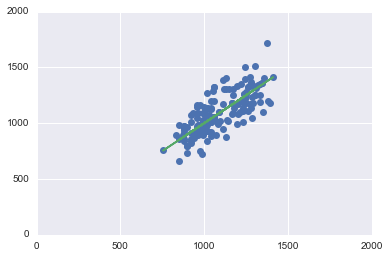

                  Results: Ordinary least squares
Model:              OLS               Adj. R-squared:     0.583    
Dependent Variable: Normalized Salary AIC:                3967.0717
Date:               2016-10-18 11:02  BIC:                4132.4633
No. Observations:   317               Log-Likelihood:     -1939.5  
Df Model:           43                F-statistic:        11.28    
Df Residuals:       273               Prob (F-statistic): 8.14e-40 
R-squared:          0.640             Scale:              14022.   
--------------------------------------------------------------------
            Coef.    Std.Err.     t     P>|t|     [0.025     0.975] 
--------------------------------------------------------------------
x1           0.5096    2.1675   0.2351  0.8143    -3.7576     4.7768
x2          -1.3602    0.3526  -3.8577  0.0001    -2.0544    -0.6661
x3          -0.2588    1.0595  -0.2443  0.8072    -2.3446     1.8269
x4          -6.8093    2.6630  -2.5570  0.0111   -12.0519   

In [14]:
""" Fit a binary classification predictor."""
#Linear Regression
xtr=x_train2
xte=x_test2
ytr=y_train2
yte=y_test2

xtr=np.array(xtr).reshape(len(xtr),len(x_train2.columns))
xte=np.array(xte).reshape(len(xte),len(x_train2.columns))
xtr2=sm.add_constant(xtr)
model=sm.OLS(ytr,xtr).fit()

xte2=sm.add_constant(xte)
pred=model.predict(xte)

plt.plot(pred,yte,'o')
plt.plot(pred,pred,'-')
plt.xlim(0,2000)
plt.ylim(0,2000)
plt.show()

print model.summary2()

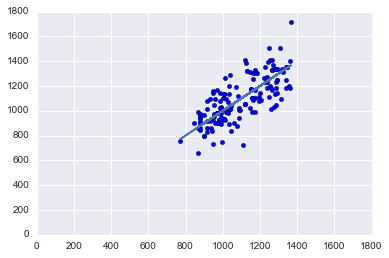

0.566748835701


13 % Grocery Items
-0.793275151735

29 % Housing
-1.20352177751

10% Utilities
-0.893063455099

12 % Transportation
-4.82678127688

4% Health Care
0.505561430329

32 % Miscellaneous Goods and Services
-2.75125246482

Sector_Capital Goods
36.1459126483

Sector_Consumer Durables
42.2843209703

Sector_Consumer Services
-6.22092560501

Sector_Energy
-0.0

Sector_Finance
-41.1337253671

Sector_Health Care
0.0

Sector_Miscellaneous
-68.6371092313

Sector_Public Utilities
17.6579562778

Sector_Technology
15.8146780428

Sector_n/a
-37.6533589851

Job_
0.0

MarketCap_Hugecap
76.763640544

MarketCap_Largecap
-83.5254450946

MarketCap_Unknown
0.0

Region_MW
-37.2861353711

Region_NE
-0.0

Region_NW
-0.0

Region_S
45.1660771112

Region_SE
-9.59347313346

Region_SW
0.0

Region_W
0.0

State_AL
-0.0

State_AR
0.0

State_AZ
0.0

State_CA
79.7816348407

State_CO
-37.2797418064

State_CT
0.0

State_DE
15.3521406969

State_FL
-40.7809549022

State_GA
0.0

State_IL
0.0

State_IN
0.0

Stat

In [15]:
ridge=Ridge(alpha=10) #Ridge is .28269 at 230
lasso=Lasso(alpha=0.5) #Lasso is 0.289105 at 2.01
lr=LinearRegression() #Linear Regression is .2763265
model=lasso.fit(x_train2,y_train2)
pred=model.predict(x_test2)
plt.scatter(pred,y_test2)
plt.plot(pred,pred)
plt.ylim(0,1800)
plt.xlim(0,1800)
plt.show()
print model.score(x_test2, y_test2)
print "\n"
for x,y in zip(x_test2.columns,model.coef_):
    print x
    print y
    print